#To what extent does an ageing population affect house prices in Leeds?

##Introduction

An increasing ageing population is a new phenomenon that the world is facing in the 21st century characterised by low fertility rates, decreasing late-life mortality, and increasing migration (Harper and Leeson, 2008). it is estimated that by 2050, people aged 60 and over will double to over 2 billion (WHO, 2022, Harper and Leeson, 2008). This brings with it many implications, some positive such as increasing productivity in some countries (Healy, 2024) and some negative, such as an increase in informal caregiving (Ratcliffe et al., 2012). In this study, the focus is on the relationship that an ageing population has on house prices, more specifically in the Leeds area of the UK.

The effect that ageing has on real estate and land prices can be seen more obviously in Japan because Japan has the fastest-growing rate of ageing population out of any developed country in the world (Saita et al., 2016). The findings by Saita et al. (2016) were that an ageing population has a negative effect on house prices in Japan. Takáts (2012) also found in their study of 22 advanced economies that ageing will decrease house prices by around 80 basis points per year. A third study in Australia concurs with these results, whereby ageing could affect property prices negatively by up to 27% over 2008-2050 (Guest and Swift, 2010).

The aims of this study are to establish first the average percentage per year differences between house prices and ageing separately. This derives the general trend of both datasets and creates averages for each LSOA in Leeds. These two results are then correlated to show their relationship to one another, with a respective r value which derives the strength of correlation. The final aim is to map where in Leeds there is a large increasing ageing population and where there is a low or even negative ageing population.

The intended audience is the general public and business owners in Leeds who are looking to purchase property. This would help them make an informed decision as to where in Leeds would be sensible to purchase property assets given the relationship between ageing and property prices.

##Methodology

Data was downloaded from the Office of National Statistics (ONS) for ageing data from 2013 to 2022 (ONS, 2024). This was the most recent data on population estimates so a 10-year period was taken to analyse. Data for house prices was also taken from the ONS website (ONS, 2024). For the final map the lower layer super output areas (LSOA) for the UK were downloaded (UK Data Service, 2022).

Data is imported to the jupyter notebook (the 10 population CSVs’, the mean house price CSV and the LSOA shapefile with respective files). Data is then cleaned using a multitude of techniques. The age to define an elderly population was taken above age 65, this is to echo research (Saita et al., 2016) even though the age of retirement in England is 66.

Percent differences between consecutive years are calculated for age and house prices. A final average of all of these percent differences between years is used for the final correlation and scatter graph outputs using the columns “average percent differences in age” and “average percent differences for house prices”.

The spatial component takes the LSOA shapefile and removes all LSOA’s not related to Leeds. The final age average percent difference column is added to this shapefile using a join and the final map is coloured accordingly from positive to negative values per each LSOA in Leeds.


# Data Cleaning

In [ ]:
# import required packages
# for visualisation
import seaborn as sns
import matplotlib.pyplot as plt

# for data manipulation
import pandas as pd
import numpy as np

In [ ]:
# upload mean_house_price_csv, skipping first 4 rows as they are blank.
hp = pd.read_csv('Mean_price_house.csv', skiprows=4)
hp.head()

In [ ]:
# Get the values from the 1st row and set new headers
new_headers = hp.iloc[0]
hp.columns = new_headers

# Start dataframe from first row
hp_clean = hp.iloc[1:]

# Reseting the index to start from 0 using drop = true to keep changes
hp_clean = hp_clean.reset_index(drop=True)

hp_clean.head()

In [ ]:
# removing all data not related to Leeds
# Chat GPT 3.5 helped in the creation of this code with prompt " how can I remove all data without the word Leeds in column local authority name"

# This defines the code to look in specified column where string contains Leeds, case = false employed incase Leeds is not capitalised
hp_clean = hp_clean[hp_clean['Local authority name'].str.contains('Leeds', case=False)]

# Reseting the index using drop = true to keep changes
hp_clean = hp_clean.reset_index(drop=True)

hp_clean.head()

In [ ]:
# Dropping all columns before year 2013 because age data starts from 2013
hp_clean = hp_clean.drop(hp_clean.columns[4:73], axis=1)


In [ ]:
hp_clean.head()

In [ ]:
# removing commas  so that mathematical functions can be ran on data
# This code was created because errors were being output when mathematical functions were ran on the data
# code was generated from chat gpt 3.5 prompt "how can i remove comma's in all columns of a dataframe"

# The first line defines 'remove_commas'. Second line defines the parameter type as string and the third lone replaces the comma with nothing
def remove_commas(value):
    if isinstance(value, str):
        return value.replace(',', '')
    return value

#applymap function is used to run the remove commas function on the dataset
hp_clean = hp_clean.applymap(remove_commas)
hp_clean.head()

In [ ]:
hp_clean.dtypes

In [ ]:
# errors were still being output from the data when a mathematical function was ran, because columns had the data type "object" rather than numeric
# code was generated from chat gpt 3.5 prompt "how can i convert all columns containing the words "Year ending" to numeric?"

# creates an if argument for columns containing 'year ending' to assign to the function 'columns_year_ending'
columns_year_ending = [col for col in hp_clean.columns if 'Year ending' in col]

# 'to_numeric' pandas function is called for the columns year ending and changes the datatype to numeric
for col in columns_year_ending:
    hp_clean[col] = pd.to_numeric(hp_clean[col], errors='coerce') # coerce needed to be called as some entries contain non numeric data

hp_clean.dtypes


In [ ]:
# taking the mean house price over each quater in each year to take an average price over the year
# Chat GPT version 3.5 was used in the creation for the "2013" line of this code - prompt "how can i take the mean of all the columns containing "2013" and create a new column with these values"

# create "house prices average" data frame or "hp_av"
hp_av = hp_clean.copy(deep=True)

#creating 1 column for each year if the columns contain the specified year
columns_2013 = [col for col in hp_av.columns if '2013' in col]
columns_2014 = [col for col in hp_av.columns if '2014' in col]
columns_2015 = [col for col in hp_av.columns if '2015' in col]
columns_2016 = [col for col in hp_av.columns if '2016' in col]
columns_2017 = [col for col in hp_av.columns if '2017' in col]
columns_2018 = [col for col in hp_av.columns if '2018' in col]
columns_2019 = [col for col in hp_av.columns if '2019' in col]
columns_2020 = [col for col in hp_av.columns if '2020' in col]
columns_2021 = [col for col in hp_av.columns if '2021' in col]
columns_2022 = [col for col in hp_av.columns if '2022' in col]

#adding "mean" columns
hp_av['2013_mean'] = hp_av[columns_2013].mean(axis=1)
hp_av['2014_mean'] = hp_av[columns_2014].mean(axis=1)
hp_av['2015_mean'] = hp_av[columns_2015].mean(axis=1)
hp_av['2016_mean'] = hp_av[columns_2016].mean(axis=1)
hp_av['2017_mean'] = hp_av[columns_2017].mean(axis=1)
hp_av['2018_mean'] = hp_av[columns_2018].mean(axis=1)
hp_av['2019_mean'] = hp_av[columns_2019].mean(axis=1)
hp_av['2020_mean'] = hp_av[columns_2020].mean(axis=1)
hp_av['2021_mean'] = hp_av[columns_2021].mean(axis=1)
hp_av['2022_mean'] = hp_av[columns_2022].mean(axis=1)

print(hp_av)

In [ ]:
# The dataset is large and only the means for each year are needed, to achieve this the first 4 columns are merged with only the columns containing the word "mean"
# Chat GPT version 3.5 was used in the creation for some of this code - prompt "I want to keep only the columns containing the word 'mean' and the first 4 columns of my dataframe"

# Get columns after the fourth column
columns_after_4 = hp_av.columns[4:]

# Filter columns containing the word "mean"
columns_mean = [col for col in columns_after_4 if 'mean' in col]

# Select columns before the fourth column
columns_before_4 = list(hp_av.columns[:4])  # Convert to list

# Concatenate the selected columns
keep_columns = columns_before_4 + columns_mean

# Select only the desired columns from the original dataframe
hp_av = hp_av[keep_columns]

hp_av.head()

In [ ]:
# read out of columns
hp_av.columns

In [ ]:
# testing the creation of a percentage difference column from year to year (2013 to 2014)

hp_av['2013-2014_perc_diff'] = ((hp_av['2014_mean'] - hp_av['2013_mean'])/hp_av['2013_mean']) * 100

hp_av.head()

In [ ]:
# Creating a percentage difference column for each year

hp_av['2013-2014_perc_diff'] = ((hp_av['2014_mean'] - hp_av['2013_mean']) / hp_av['2013_mean']) * 100
hp_av['2014-2015_perc_diff'] = ((hp_av['2015_mean'] - hp_av['2014_mean']) / hp_av['2014_mean']) * 100
hp_av['2015-2016_perc_diff'] = ((hp_av['2016_mean'] - hp_av['2015_mean']) / hp_av['2015_mean']) * 100
hp_av['2016-2017_perc_diff'] = ((hp_av['2017_mean'] - hp_av['2016_mean']) / hp_av['2016_mean']) * 100
hp_av['2017-2018_perc_diff'] = ((hp_av['2018_mean'] - hp_av['2017_mean']) / hp_av['2017_mean']) * 100
hp_av['2018-2019_perc_diff'] = ((hp_av['2019_mean'] - hp_av['2018_mean']) / hp_av['2018_mean']) * 100
hp_av['2019-2020_perc_diff'] = ((hp_av['2020_mean'] - hp_av['2019_mean']) / hp_av['2019_mean']) * 100
hp_av['2020-2021_perc_diff'] = ((hp_av['2021_mean'] - hp_av['2020_mean']) / hp_av['2020_mean']) * 100
hp_av['2021-2022_perc_diff'] = ((hp_av['2022_mean'] - hp_av['2021_mean']) / hp_av['2021_mean']) * 100

hp_av.head()

In [ ]:
# Creating an average percentage difference in house prices from the period 2013-2022

hp_av['average_perc_diff'] = (hp_av['2013-2014_perc_diff'] + hp_av['2014-2015_perc_diff'] + hp_av['2015-2016_perc_diff'] + hp_av['2016-2017_perc_diff'] + hp_av['2017-2018_perc_diff'] +
                            hp_av['2018-2019_perc_diff'] + hp_av['2019-2020_perc_diff'] + hp_av['2020-2021_perc_diff'] + hp_av['2021-2022_perc_diff']) / 9

hp_av.head()

In [ ]:
# Getting a print out of the average_perc_diff column
print(hp_av['average_perc_diff'])

In [ ]:
# Data cleaning and processing for the average house price percent difference is complete. The only columns needed are this final column and the first 4 columns
# The age data will be joined to this new dataset later on in the workflow
# Chat gpt 3.5 was used in the creation of this code with prompt "after column 4 i only want to keep column average_perc_diff"

final_df = hp_av.copy(deep=True)

# looking in only columns after 4
columns_after_4 = final_df.columns[4:]

# Filter columns containing the word "average_perc_diff"
average_perc = [col for col in columns_after_4 if 'average_perc_diff' in col]

# Select columns before the fourth column
columns_before_4 = list(hp_av.columns[:4])  # Convert to list

# Concatenate the selected columns
keep_columns = columns_before_4 + average_perc

# Select only the desired columns from the original dataframe
final_df = final_df[keep_columns]

final_df.head()



In [ ]:
# Checking for null values in the final dataframe
final_df.isnull().sum()

In [ ]:
# Removing null rows

final_df = final_df.dropna()

final_df.isnull().sum()

In [ ]:
# 19 Null rows have been dropped
final_df.shape

## This section is for 'Age' derived from population data

Data is derived from 10 CSVs so data cleaning code was tested on the first CSV (2013_pop) before running most of the functions on the other data sets when it was found it worked.

Final columns derived from data cleaning and running mathematical functions are added to an age_df dataframe and the final_df dataframe in the next section.

In [ ]:
# 2013 population data is imported first before the other 9 years to see what data processing is needed for all of them

# upload 2013 population age data, skipping first 4 rows as they are blank.
age_2013 = pd.read_csv('2013_pop.csv', skiprows=4)


age_2013.head()

In [ ]:
# Using the remove commas function previously defined in the house price data

age_2013 = age_2013.applymap(remove_commas)
age_2013.head()

In [ ]:
# Converting datatypes so mathematical functions can be ran on the data

# Select columns after the third column
columns_to_convert = age_2013.columns[3:]

# Convert selected columns to numeric data type
age_2013[columns_to_convert] = age_2013[columns_to_convert].apply(pd.to_numeric, errors='coerce')

age_2013.dtypes

In [ ]:
# For the mathematical operation to be performed i need to know what number columns are needed
# Chat GPT 3.5 was used to generate this code with prompt "how can i get a print out of all columns and their respective column number in the dataframe"

#using a for statement it indexes the columns and shows the index next to the column name
for idx, col in enumerate(age_2013.columns):
    print(f"Column {idx}: {col}")

In [ ]:
# Creating columns to sum and divide so that a new column 'percent old' can be established
# column 69 chosen because it relates to ages above 65, this is defining the amount of people in the ageing population category (Saita et al., 2016)
columns_to_sum = age_2013.columns[69:95]
column_to_divide = age_2013.columns[3]

age_2013['percent_old'] = (age_2013[columns_to_sum].sum(axis=1) / age_2013[column_to_divide]) * 100
age_2013.head()

In [ ]:
# Keeping only Leeds entries
# Chat GPT 3.5 helped in the creation of this code with prompt " how can I keep only entries that contain the word 'Leeds' in 'LSOA name"

age_2013 = age_2013.dropna(subset=['LSOA name'])

age_2013 = age_2013[age_2013['LSOA name'].str.contains('Leeds')]

age_2013.head()

In [ ]:
# keeping only 'Area Codes','LSOA name', 'percent_old' columns
age_2013_clean = age_2013.loc[:, ['Area Codes','LSOA name', 'percent_old']]

age_2013_clean.head()

In [ ]:
# Creating age dataframe and renaming the percent old column from 2013 so that other years can be joined later

age_df = age_2013_clean.copy(deep=True)

age_df.rename(columns={'percent_old': '2013_perc_old'}, inplace=True) # Inplace = true to overwrite the dataframe

age_df.head()

In [ ]:
# with the dataframe from 2013 done, the same code can be applied to all other dataframe years
age_2014 = pd.read_csv('2014_pop.csv', skiprows=4)

age_2014 = age_2014.applymap(remove_commas)

columns_to_convert = age_2014.columns[3:]

# Convert selected columns to numeric data type
age_2014[columns_to_convert] = age_2014[columns_to_convert].apply(pd.to_numeric, errors='coerce')



age_2014.dtypes

In [ ]:
# Looking up column numbers

for idx, col in enumerate(age_2014.columns):
    print(f"Column {idx}: {col}")

In [ ]:
# Running same code from age_2013 on age_2014

columns_to_sum = age_2014.columns[69:95]
column_to_divide = age_2014.columns[3]

age_2014['2014_perc_old'] = (age_2014[columns_to_sum].sum(axis=1) / age_2014[column_to_divide]) * 100


age_2014 = age_2014.dropna(subset=['LSOA name'])

age_2014 = age_2014[age_2014['LSOA name'].str.contains('Leeds')]

age_2014_clean = age_2014.loc[:, ['Area Codes','LSOA name', '2014_perc_old']]

age_2014_clean.head()

In [ ]:
# Joining 2014 to "age_df"

age_df = age_df.merge(age_2014_clean[['Area Codes', '2014_perc_old']], on="Area Codes", how="left")

age_df.head()


In [ ]:
# with the dataframe from 2013 done, the same code can be applied to all other dataframe years

#skipping 3 rows as there are 3 blank columns here not 4
age_2015 = pd.read_csv('2015_pop.csv', skiprows=3)

age_2015 = age_2015.applymap(remove_commas)

columns_to_convert = age_2015.columns[3:]

# Convert selected columns to numeric data type
age_2015[columns_to_convert] = age_2015[columns_to_convert].apply(pd.to_numeric, errors='coerce')



age_2015.dtypes

In [ ]:
# Looking up column numbers

for idx, col in enumerate(age_2015.columns):
    print(f"Column {idx}: {col}")

In [ ]:
# Running same code from age_2013 on age_2015

columns_to_sum = age_2015.columns[69:95]
column_to_divide = age_2015.columns[3]

age_2015['2015_perc_old'] = (age_2015[columns_to_sum].sum(axis=1) / age_2015[column_to_divide]) * 100


age_2015 = age_2015.dropna(subset=['LSOA Name'])

age_2015 = age_2015[age_2015['LSOA Name'].str.contains('Leeds')]

age_2015_clean = age_2015.loc[:, ['Area Codes','LSOA Name', '2015_perc_old']]

age_2015_clean.head()

In [ ]:
# Joining 2015 to "age_df"

age_df = age_df.merge(age_2015_clean[['Area Codes', '2015_perc_old']], on="Area Codes", how="left")

age_df.head()

In [ ]:
# with the dataframe from 2013 done, the same code can be applied to all other dataframe years

age_2016 = pd.read_csv('2016_pop.csv', skiprows=4)

age_2016 = age_2016.applymap(remove_commas)

columns_to_convert = age_2016.columns[3:]

# Convert selected columns to numeric data type
age_2016[columns_to_convert] = age_2016[columns_to_convert].apply(pd.to_numeric, errors='coerce')



age_2016.dtypes


In [ ]:
# Looking up column numbers
for idx, col in enumerate(age_2016.columns):
    print(f"Column {idx}: {col}")

In [ ]:
# with the dataframe from 2013 done, the same code can be applied to all other dataframe years

columns_to_sum = age_2016.columns[69:95]
column_to_divide = age_2016.columns[3]

age_2016['2016_perc_old'] = (age_2016[columns_to_sum].sum(axis=1) / age_2016[column_to_divide]) * 100


age_2016 = age_2016.dropna(subset=['LSOA name'])

age_2016 = age_2016[age_2016['LSOA name'].str.contains('Leeds')]

age_2016_clean = age_2016.loc[:, ['Area Codes','LSOA name', '2016_perc_old']]

age_2016_clean.head()

In [ ]:
# Joining 2016 to "age_df"

age_df = age_df.merge(age_2016_clean[['Area Codes', '2016_perc_old']], on="Area Codes", how="left")

age_df.head()

In [ ]:
# with the dataframe from 2013 done, the same code can be applied to all other dataframe years

age_2017 = pd.read_csv('2017_pop.csv', skiprows=4)

age_2017 = age_2017.applymap(remove_commas)

columns_to_convert = age_2017.columns[3:]

# Convert selected columns to numeric data type
age_2017[columns_to_convert] = age_2017[columns_to_convert].apply(pd.to_numeric, errors='coerce')



age_2017.dtypes

In [ ]:
# Looking up column numbers

for idx, col in enumerate(age_2017.columns):
    print(f"Column {idx}: {col}")

In [ ]:
#Creating percentage of population over 65 column
columns_to_sum = age_2017.columns[69:95]
column_to_divide = age_2017.columns[3]

age_2017['2017_perc_old'] = (age_2017[columns_to_sum].sum(axis=1) / age_2017[column_to_divide]) * 100


age_2017 = age_2017.dropna(subset=['LSOA name'])

age_2017 = age_2017[age_2017['LSOA name'].str.contains('Leeds')]

age_2017_clean = age_2017.loc[:, ['Area Codes','LSOA name', '2017_perc_old']]

age_2017_clean.head()

In [ ]:
# Joining 2017 to "age_df"

age_df = age_df.merge(age_2017_clean[['Area Codes', '2017_perc_old']], on="Area Codes", how="left")

age_df.head()

In [ ]:
# with the dataframe from 2013 done, the same code can be applied to all other dataframe years
age_2018 = pd.read_csv('2018_pop.csv', skiprows=4)

age_2018 = age_2018.applymap(remove_commas)

columns_to_convert = age_2018.columns[3:]

# Convert selected columns to numeric data type
age_2018[columns_to_convert] = age_2018[columns_to_convert].apply(pd.to_numeric, errors='coerce')



age_2018.dtypes

In [ ]:
# After importing, values were brought in as float rather than integer.
# Chat GPT 3.5 was used to output this code with prompt - "how to convert all float columns to integer, with some values being NaN"
for col in age_2018.columns:
    if age_2018[col].dtype == 'float64':
        age_2018[col] = age_2018[col].fillna(0).astype(int)

age_2018.dtypes

In [ ]:
# Looking up column numbers

for idx, col in enumerate(age_2018.columns):
    print(f"Column {idx}: {col}")

In [ ]:
# with the dataframe from 2013 done, the same code can be applied to all other dataframe years
#Creating percentage of population over 65 column
columns_to_sum = age_2018.columns[69:95]
column_to_divide = age_2018.columns[3]

age_2018['2018_perc_old'] = (age_2018[columns_to_sum].sum(axis=1) / age_2018[column_to_divide]) * 100


age_2018 = age_2018.dropna(subset=['LSOA name'])

age_2018 = age_2018[age_2018['LSOA name'].str.contains('Leeds')]

age_2018_clean = age_2018.loc[:, ['Area Codes','LSOA name', '2018_perc_old']]

age_2018_clean.head()

In [ ]:
# Joining 2018 to "age_df"

age_df = age_df.merge(age_2018_clean[['Area Codes', '2018_perc_old']], on="Area Codes", how="left")

age_df.head()

In [ ]:
# importing 2019_csv. There were errors in using mathematical functions further down the line, so it was necassary
# to import the file with the 'thousands' denominator and to convert all columns to integer
# Chat gpt 3.5 helped with the generation of this code with the prompt "i have over 90 columns in this dataset so i dont want to assign a datatype for each column. is there a quick way to specify all columns to integer apart from the first 2 columns"
# Chat gpt 3.5 error handling helped with adding the "thousands" denominator

# Read CSV file, skipping the first 4 rows
age_2019 = pd.read_csv('2019_pop.csv', skiprows=4)

# Get column names excluding the first two columns
column_names = age_2019.columns[2:]

# Create a dictionary to specify data types for all columns after the first two columns
dtype_dict = {column: 'int' for column in column_names}

# Read CSV file again with specified data types for all columns after the first two columns, handling non-numeric values
age_2019 = pd.read_csv('2019_pop.csv', skiprows=4, dtype=dtype_dict, thousands=',')

age_2019.head()

In [ ]:
# Looking up column numbers

for idx, col in enumerate(age_2019.columns):
    print(f"Column {idx}: {col}")

In [ ]:
# with the dataframe from 2013 done, the same code can be applied to all other dataframe years
#Creating percentage of population over 65 column

columns_to_sum = age_2019.columns[68:94]
column_to_divide = age_2019.columns[2]

age_2019['2019_perc_old'] = (age_2019[columns_to_sum].sum(axis=1) / age_2019[column_to_divide]) * 100


age_2019 = age_2019.dropna(subset=['LSOA Name'])

age_2019 = age_2019[age_2019['LSOA Name'].str.contains('Leeds')]

age_2019_clean = age_2019.loc[:, ['LSOA Code','LSOA Name', '2019_perc_old']]

age_2019_clean.head()

In [ ]:
# Renaming LSOA code column name to match age_df before joining

age_2019_clean.rename(columns={'LSOA Code': 'Area Codes'}, inplace=True)

age_2019_clean.head()

In [ ]:
# Joining 2019 to "age_df"

age_df = age_df.merge(age_2019_clean[['Area Codes', '2019_perc_old']], on="Area Codes", how="left")

age_df.head()

In [ ]:
# Using same code as 2019 for 2020

age_2020 = pd.read_csv('2020_pop.csv', skiprows=4)

# Get column names excluding the first two columns
column_names = age_2020.columns[2:]

# Create a dictionary to specify data types for all columns after the first two columns
dtype_dict = {column: 'int' for column in column_names}

# Read CSV file again with specified data types for all columns after the first two columns, handling non-numeric values
age_2020 = pd.read_csv('2020_pop.csv', skiprows=4, dtype=dtype_dict, thousands=',')

age_2020.dtypes

In [ ]:
# Looking up column numbers

for idx, col in enumerate(age_2020.columns):
    print(f"Column {idx}: {col}")

In [ ]:
# Creating over 65 column

columns_to_sum = age_2020.columns[68:94]
column_to_divide = age_2020.columns[2]

age_2020['2020_perc_old'] = (age_2020[columns_to_sum].sum(axis=1) / age_2020[column_to_divide]) * 100


age_2020 = age_2020.dropna(subset=['LSOA Name'])

age_2020 = age_2020[age_2020['LSOA Name'].str.contains('Leeds')]

age_2020_clean = age_2020.loc[:, ['LSOA Code','LSOA Name', '2020_perc_old']]

age_2020_clean.head()

In [ ]:
# Renaming LSOA code column name to match age_df before joining

age_2020_clean.rename(columns={'LSOA Code': 'Area Codes'}, inplace=True)

age_2020_clean.head()

In [ ]:
# Joining 2020 to "age_df"

age_df = age_df.merge(age_2020_clean[['Area Codes', '2020_perc_old']], on="Area Codes", how="left")

age_df.head()

In [ ]:
# Running same code as 2019 for 2021

age_2021 = pd.read_csv('2021_pop.csv', skiprows=3)

# Get column names excluding the first two columns
column_names = age_2021.columns[2:]

# Create a dictionary to specify data types for all columns after the first two columns
dtype_dict = {column: 'int' for column in column_names}

# Read CSV file again with specified data types for all columns after the first two columns, handling non-numeric values
age_2021 = pd.read_csv('2021_pop.csv', skiprows=3, dtype=dtype_dict, thousands=',')

age_2021.head()

In [ ]:
# Looking up column numbers

for idx, col in enumerate(age_2021.columns):
    print(f"Column {idx}: {col}")

In [ ]:
# Creating 2021 clean first before creating over 65 column

age_2021_clean = age_2021.copy(deep=True)

age_2021_clean = age_2021.dropna(subset=['LSOA name'])

age_2021_clean = age_2021[age_2021['LSOA name'].str.contains('Leeds')]



age_2021_clean.head()

In [ ]:
# This dataset is split into male and female so a slightly different mathematical function needs to be ran from the others
# Errors were found when concatenating so numpy was employed to deal with the error
# Error handling was informed by chat gpt 3.5 by pasting in error

# concatenating using numpy
columns_to_sum = np.concatenate([age_2021_clean.columns[68:94], age_2021_clean.columns[159:185]])
column_to_divide = age_2021_clean.columns[2]

age_2021_clean['2021_perc_old'] = (age_2021_clean[columns_to_sum].sum(axis=1) / age_2021_clean[column_to_divide]) * 100

age_2021_clean = age_2021_clean.loc[:, ['LSOA 2021 Code','LSOA name', '2021_perc_old']]

age_2021_clean.head()


In [ ]:
age_2021_clean.shape

In [ ]:
# Renaming column to join to main age_df
age_2021_clean.rename(columns={'LSOA 2021 Code': 'Area Codes'}, inplace=True)

In [ ]:
# Joining 2021 to "age_df"

age_df = age_df.merge(age_2021_clean[['Area Codes', '2021_perc_old']], on="Area Codes", how="left")

age_df.head()

In [ ]:
# Using same code as 2021 for 2022

age_2022 = pd.read_csv('2022_pop.csv', skiprows=3)

# Get column names excluding the first two columns
column_names = age_2022.columns[2:]

# Create a dictionary to specify data types for all columns after the first two columns
dtype_dict = {column: 'int' for column in column_names}

# Read CSV file again with specified data types for all columns after the first two columns, handling non-numeric values
age_2022 = pd.read_csv('2022_pop.csv', skiprows=3, dtype=dtype_dict, thousands=',')

age_2022.head()



In [ ]:
# Looking up column numbers

for idx, col in enumerate(age_2021.columns):
    print(f"Column {idx}: {col}")

In [ ]:
# Using same code as 2021 for 2022

age_2022_clean = age_2022.copy(deep=True)

age_2022_clean = age_2022.dropna(subset=['LSOA name'])

age_2022_clean = age_2022[age_2022['LSOA name'].str.contains('Leeds')]



age_2022_clean.head()

In [ ]:
# Using same code as 2021 for 2022

columns_to_sum = np.concatenate([age_2022_clean.columns[68:94], age_2022_clean.columns[159:185]])
column_to_divide = age_2022_clean.columns[2]

age_2022_clean['2022_perc_old'] = (age_2022_clean[columns_to_sum].sum(axis=1) / age_2022_clean[column_to_divide]) * 100

age_2022_clean = age_2022_clean.loc[:, ['LSOA 2021 Code','LSOA name', '2022_perc_old']]

age_2022_clean.head()

In [ ]:
# Renaming column to join to main age_df
age_2022_clean.rename(columns={'LSOA 2021 Code': 'Area Codes'}, inplace=True)

In [ ]:
# Joining 2022 to "age_df"

age_df = age_df.merge(age_2022_clean[['Area Codes', '2022_perc_old']], on="Area Codes", how="left")

age_df.head()

# Working with final age dataframe and final combined age and house price dataframe

In [ ]:

age_df.head()


In [ ]:
age_df.shape

In [ ]:
# Calculating percent differences between years

age_df['2013-2014_perc_diff'] = ((age_df['2014_perc_old'] - age_df['2013_perc_old']) / age_df['2013_perc_old']) * 100
age_df['2014-2015_perc_diff'] = ((age_df['2015_perc_old'] - age_df['2014_perc_old']) / age_df['2014_perc_old']) * 100
age_df['2015-2016_perc_diff'] = ((age_df['2016_perc_old'] - age_df['2015_perc_old']) / age_df['2015_perc_old']) * 100
age_df['2016-2017_perc_diff'] = ((age_df['2017_perc_old'] - age_df['2016_perc_old']) / age_df['2016_perc_old']) * 100
age_df['2017-2018_perc_diff'] = ((age_df['2018_perc_old'] - age_df['2017_perc_old']) / age_df['2017_perc_old']) * 100
age_df['2018-2019_perc_diff'] = ((age_df['2019_perc_old'] - age_df['2018_perc_old']) / age_df['2018_perc_old']) * 100
age_df['2019-2020_perc_diff'] = ((age_df['2020_perc_old'] - age_df['2019_perc_old']) / age_df['2019_perc_old']) * 100
age_df['2020-2021_perc_diff'] = ((age_df['2021_perc_old'] - age_df['2020_perc_old']) / age_df['2020_perc_old']) * 100
age_df['2021-2022_perc_diff'] = ((age_df['2022_perc_old'] - age_df['2021_perc_old']) / age_df['2021_perc_old']) * 100

age_df.head()

In [ ]:
age_df.shape

In [ ]:
# Looking up column numbers in age_df

for idx, col in enumerate(age_df.columns):
    print(f"Column {idx}: {col}")

In [ ]:
# Calculating the average percent difference between years

columns_to_sum = age_df.columns[13:22]


age_df['av_per_diff_age'] = (age_df[columns_to_sum].sum(axis=1) / 9)


age_df.head()

In [ ]:
age_df.isna().sum()

In [ ]:
# Checking names of columns in final_df
final_df.head()

In [ ]:
# Renaming 'Area Codes' in the age dataframe to match the final dataframe

age_df.rename(columns={'Area Codes': 'LSOA code'}, inplace=True)

In [ ]:
#Merging the age data frome with the final dataframe

final_df = final_df.merge(age_df[['LSOA code', 'av_per_diff_age']], on="LSOA code", how="left")


In [ ]:
# Renaming the house price average difference column

final_df.rename(columns={'average_perc_diff': 'av_per_diff_house'}, inplace=True)

# Taking a look at the final dataframe with combined average house price difference and average percent difference between elderly people per LSOA over 10 years
final_df.head()

# Data visualisation for non-spatial component

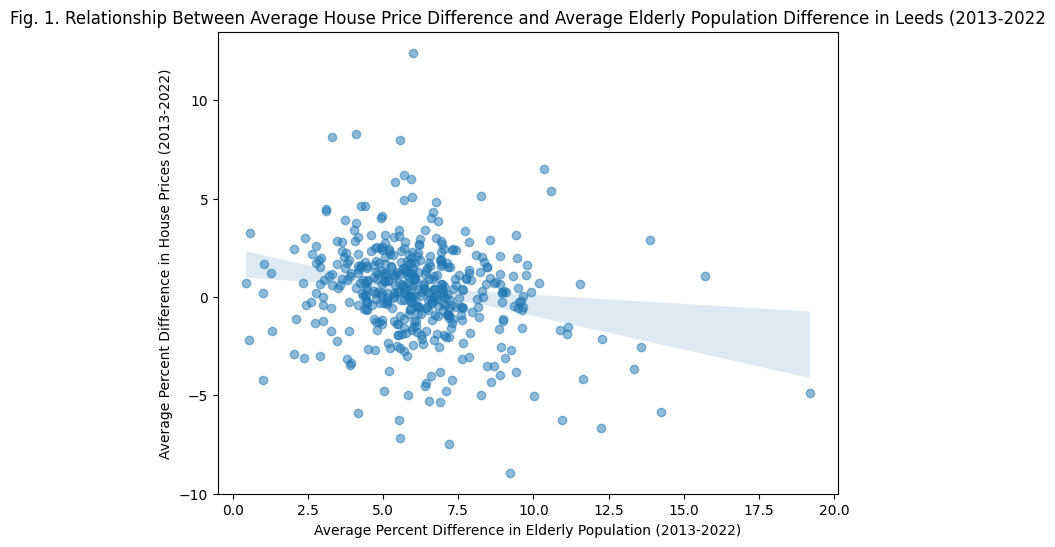

In [248]:
# Plotting relationship between average elderly population difference and average house price difference over a 10 year period (2013-2022)
plt.figure(figsize=(8, 6))

# Scatter_kws argument was used to better represent where a lot of points were clustered with 'alpha' 0.5 to make points slightly transparent(stack overflow, 2015)
sns.regplot(data=final_df, x='av_per_diff_house', y='av_per_diff_age', scatter_kws={'alpha':0.5})
plt.title('Fig. 1. Relationship Between Average House Price Difference and Average Elderly Population Difference in Leeds (2013-2022')
plt.xlabel('Average Percent Difference in Elderly Population (2013-2022)')
plt.ylabel('Average Percent Difference in House Prices (2013-2022)')

plt.show()

In [ ]:
# Quantifying the strength of the correlation between average percent of elderly difference over 10 years with average percent of house price difference over 10 years
spearman_corr = final_df['av_per_diff_age'].corr(final_df['av_per_diff_house'], method='spearman')
print(spearman_corr)

##Choices made in the scatterplot

Spearmans rank correlation statistical method was used to output the correlation coefficient between the average percent difference in age and the average percent difference in house prices because it deals with non-normalised data and outliers better (Schober et al., 2018). Results seem to be clustered, therefore the use of transparent points was employed to give a better representation of the number of points.

# Data visualisation for spatial component

In [ ]:
!pip install contextily
!pip install geoplot

In [ ]:
import geopandas as gpd
import contextily as ctx
import geoplot as gplt
import geoplot.crs as gcrs

In [ ]:
# Load in all files (.shp, .dbf, .prj, .shx) for england_lsoa_2021 into jupyter files
# Reading in LSOA shapefile

lsoa = gpd.read_file('england_lsoa_2021.shp')

lsoa.head()

In [ ]:
# Removing all data not related to Leeds
leeds = lsoa[lsoa['lsoa21nm'].str.contains('Leeds', case=False)]

leeds.head()

In [ ]:
# Looking at number of columns and rows for final_df
final_df.shape

In [ ]:
# Looking at number of columns and rows for leeds
leeds.shape

In [ ]:
# Looking at number of columns and rows for age_df
age_df.shape

In [ ]:
# Getting print out of headings for columns in age_df
age_df.head()

In [ ]:
# Joining age_df to leeds dataframe as it has more complete columns as final_df removed 19 null values previously because of no values for price data

leeds_merge  = pd.merge(leeds, age_df,  left_on='lsoa21cd', right_on='LSOA code', how='left')

leeds_merge.head()

In [ ]:
# Error messages in later code suggest null values in leeds_merge
leeds_merge.isna().sum()

In [ ]:
# There are no null values however, warning messages were output when trying to create a map. Suggestions that there may be infinite values

np.isinf(leeds_merge['av_per_diff_age']).sum()

In [ ]:
# Replacing infinite values with 0
# Chat GPT 3.5 was used in the creation of this code with prompt " how can I convert infinite values for a specific column"

# Replaces any positive or negative infinite values with 'nan' value
leeds_merge['av_per_diff_age'].replace([np.inf, -np.inf], np.nan, inplace=True)

# Replaces 'nan' values with 0
leeds_merge['av_per_diff_age'].fillna(0, inplace=True)

np.isinf(leeds_merge['av_per_diff_age']).sum()

In [ ]:
# Checking coordinate system of Leeds output areas
print(leeds_merge.crs)

In [ ]:
# Installing matplotlib scalebar
!pip install matplotlib-scalebar

In [ ]:
# Importing scalebar from matplotlib
from matplotlib_scalebar.scalebar import ScaleBar


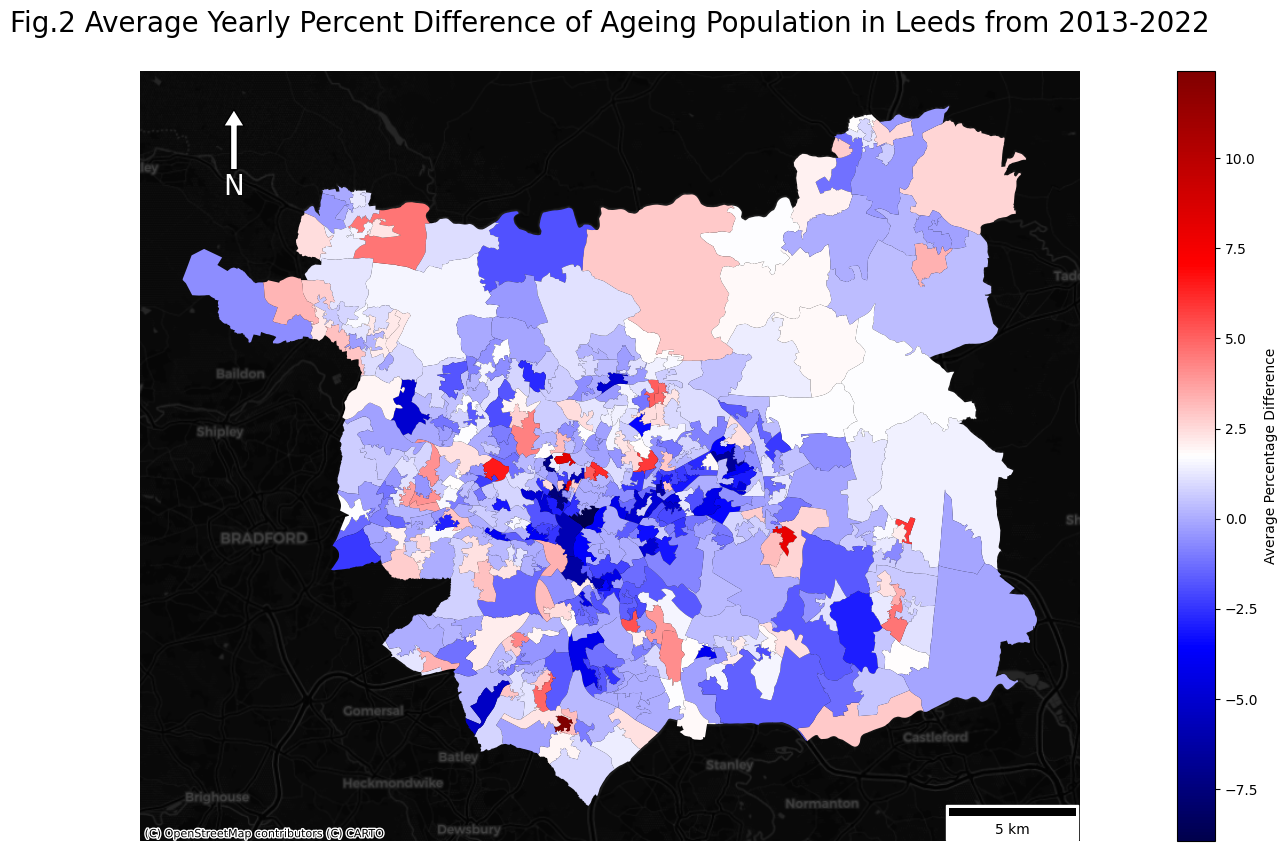

In [249]:

# Plotting map and visualisation options
f,ax = plt.subplots(1, figsize=(25,10))
leeds_merge.plot(column='av_per_diff_age',legend=True,ax=ax, cmap='seismic').set_title('Fig.2 Average Yearly Percent Difference of Ageing Population in Leeds from 2013-2022', fontsize='20', y=1.04)

# Remove axis
ax.set_axis_off()

# Adding basemap with 27700 crs to match the shapefile
ctx.add_basemap(ax, source=ctx.providers.CartoDB.DarkMatter, crs= 'EPSG:27700')

#Chat GPT 3.5 was used in being able to label the colour bar with prompt "how do i label the colour bar on the right side of the map"
cbar = ax.get_figure().get_axes()[1]

# Seting label for the colourbar
cbar.set_ylabel('Average Percentage Difference')

#Chat GPT 3.5 was used in being able to add a scale bar with prompt "how do i add a scale bar to the map"
#setting the units as metres and adding it to the lower right of the map
scalebar = ScaleBar(1, units='m', location='lower right')
ax.add_artist(scalebar)

# Adding North arrow, (modified from stack overflow)
#setting the position
x, y, arrow_length = 0.1, 0.95, 0.1
#annotating with attributes for North arrow
ax.annotate('N',color='white', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='white', width=5, headwidth=15),
            ha='center', va='center', fontsize=20,
            xycoords=ax.transAxes)

plt.show();

##Choices made in the map

The colour palette was set to ‘seismic’ because it is a divergent colour palette and the top end of the scale is worse when taking into account the correlation graph in Figure 1. This is why the colour red is used for large percent differences and blue is used for negative values as red is usually seen to indicate ‘bad’ areas. The base map was used because it offered the least obstruction to the data whilst still providing general area context.

The ‘age_df’ was used to merge with the ‘Leeds’ shapefile because the ‘final_df’ had 19 fewer areas because of the house price data and removing null values. There are still 6 areas missing from the LSOA in Leeds as seen in Figure 2 because the shapefile uses 2021 boundaries and codes, therefore the age_df LSOA codes may not be from 2021 so some data does not exist.


#Results and Discussion




The scatter plot in Figure 1 shows how the average percent difference of over 65’s relates to the average percent price difference over the years 2013-2022. The results show that an ageing population has a weak to moderate negative correlation (Schober et al., 2018), for house prices over this period for the LSOAs of Leeds. This finding means that potentially an increased ageing population in an LSOA in Leeds leads to a decrease in house pricing, this is concurrent with the research (Saita et al., 2016, Takáts, 2012). The correlation isn’t strong however, so this suggests there are multiple other factors at play that dictate house price fluctuations in a given area.

The Map in Figure 2 shows the distribution of the highest and lowest averages of percentage difference in ageing populations from 2013-2022. High percentage numbers indicate a faster growing ageing population and those with negative percentage numbers mean that the area has a declining ageing population. Figure 2 seems to show generally a declining ageing population towards the centre of Leeds although some outliers are present.

This correlation suggests to businesses and the wider general public that purchasing a property inside an area with a growing ageing population means that the value of the property may decline over time rather than appreciate. Generally, people want their assets to appreciate in value so the map suggests places that are potentially unwise to invest in property if there is a high ageing population, the same is true of the reverse.

# Conclusion



To conclude, the relationship between property prices and an ageing population has been explored for the LSOAs in Leeds. The data can be used to inform choices of property purchasing with the intended audience for this data being the general public and businesses. Limitations of this data have been documented with further improvements suggested.

# Data and References




##Data

Ageing:
ONS. 2024. Lower layer Super Output Area population estimates (supporting information) - Office for National Statistics. [Online]. [Accessed 9 May 2024]. Available from: https://www.ons.gov.uk/peoplepopulationandcommunity/populationandmigration/populationestimates/datasets/lowersuperoutputareamidyearpopulationestimates.

House Prices:
ONS. 2024. House price data: annual tables - Office for National Statistics. [Online]. [Accessed 9 May 2024]. Available from: https://www.ons.gov.uk/economy/inflationandpriceindices/datasets/housepriceindexannualtables2039.

LSOA Shapefile:
UK Data Service 2022. 2011 census geography boundaries (Lower Layer Super Output Areas and data zones). UK Data Service. [Online]. [Accessed 9 May 2024]. Available from: https://statistics.ukdataservice.ac.uk/dataset/2011-census-geography-boundaries-lower-layer-super-output-areas-and-data-zones.

##References

Chat GPT 3.5 n.d. Chat GPT 3.5. [Online]. [Accessed 9 May 2024]. Available from: https://openai.com/.

Guest, R. and Swift, R. 2010. Population ageing and house prices in Australia. Australian Economic Review. 43(3), pp.240–253.

Healy, J. 2004. The benefits of an ageing population [Online]. Canberra: Australia Institute. [Accessed 13 May 2024]. Available from: https://library.bsl.org.au/jspui/bitstream/1/576/1/The%20benefits%20of%20an%20ageing%20population,%20Healy%20Judith.pdf.

Harper, S. and Leeson, G. 2008. Introducing the Journal of Population Ageing. Journal of Population Ageing. 1(1), pp.1–5.

Ratcliffe, J., Lester, L.H., Couzner, L. and Crotty, M. 2012. An assessment of the relationship between informal caring and quality of life in older community-dwelling adults - more positives than negatives? Health &amp; Social Care in the Community. 21(1) ,pp.35–46.

Saita, Y., Shimizu, C. and Watanabe, T. 2016. Aging and real estate prices: Evidence from Japanese and US Regional Data. International Journal of Housing Markets and Analysis. 9(1), pp.66–87.

Schober, P., Boer, C. and Schwarte, L.A. 2018. Correlation coefficients: Appropriate use and interpretation. Anesthesia & Analgesia. 126(5), pp.1763–1768.

Takáts, E. 2012. Aging and house prices. Journal of Housing Economics. 21(2), pp.131–141.

WHO. 2022. Ageing and health. World Health Organization. [Online]. [Accessed 16 May 2024]. Available from: https://www.who.int/news-room/fact-sheets/detail/ageing-and-health.